In [68]:
from utils.FloorplanToBlenderLib import *
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFilter
from IPython.display import display

img_path = "Images/test5.jpg"

# Read floorplan image
img = cv2.imread(img_path)

# Create blank image
height, width, channels = img.shape
blank_image = np.zeros((height,width,3), np.uint8)

# Grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# detect outer Contours (simple floor or roof solution), paint them red on blank_image
contour, contour_img = detect.detectOuterContours(gray, blank_image, color=(255, 0, 0))

gray_wall_filter = detect.wall_filter(gray)

gray_wall_filter = ~gray_wall_filter

rooms, colored_rooms = detect.find_rooms(gray_wall_filter.copy())

gray_rooms =  cv2.cvtColor(colored_rooms, cv2.COLOR_BGR2GRAY)

# get box positions for rooms
boxes_rooms, room_img = detect.detectPreciseBoxes(gray_rooms, gray_rooms)


# create wall image (filter out small objects from image)
wall_img = detect.wall_filter(gray)
# wall_img = cv2.cvtColor(wall_img, cv2.COLOR_GRAY2BGR)
# detect walls
# boxes_walls, img = detect.detectPreciseBoxes(wall_img)



# display(Image.fromarray(contour_img))
# display(Image.fromarray(colored_rooms))
# display(Image.fromarray(wall_img))

# print(type(contour_img))
print(type(colored_rooms))
print(type(wall_img))

# print(contour_img.shape)
print(colored_rooms.shape)
print(wall_img.shape)





<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(768, 1024, 3)
(768, 1024)


In [53]:
detect?

Type:        module
String form: <module 'utils.FloorplanToBlenderLib.detect' from 'D:\\Documents\\Akademic\\Programming\\Bootcamp\\iSpan_BigData\\99_Project\\3_專題執行\\contour_detection\\Test\\utils\\FloorplanToBlenderLib\\detect.py'>
File:        d:\documents\akademic\programming\bootcamp\ispan_bigdata\99_project\3_專題執行\contour_detection\test\utils\floorplantoblenderlib\detect.py
Docstring:   <no docstring>


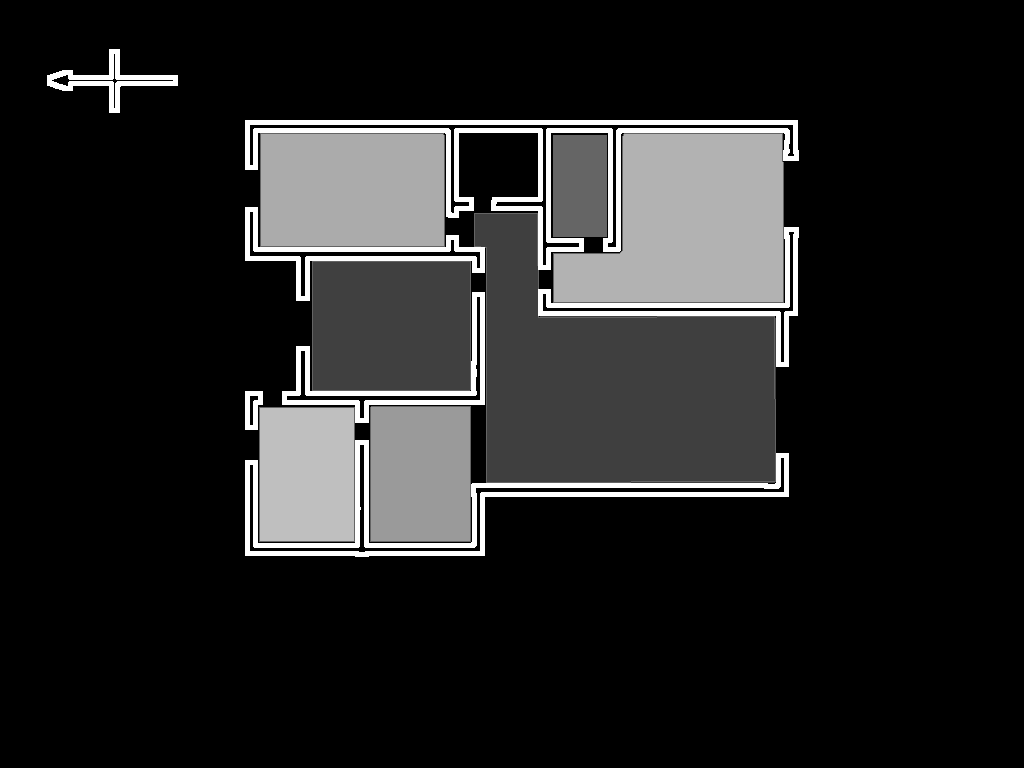

In [69]:
# combine1 = cv2.addWeighted(room_img, 1, wall_img, 1, 0)
# display(Image.fromarray(combine1))

combine2 = cv2.bitwise_or(wall_img, room_img)
display(Image.fromarray(combine2))

In [29]:
cv2.addWeighted?

Docstring:
addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
.   @brief Calculates the weighted sum of two arrays.
.   
.   The function addWeighted calculates the weighted sum of two arrays as follows:
.   \f[\texttt{dst} (I)= \texttt{saturate} ( \texttt{src1} (I)* \texttt{alpha} +  \texttt{src2} (I)* \texttt{beta} +  \texttt{gamma} )\f]
.   where I is a multi-dimensional index of array elements. In case of multi-channel arrays, each
.   channel is processed independently.
.   The function can be replaced with a matrix expression:
.   @code{.cpp}
.       dst = src1*alpha + src2*beta + gamma;
.   @endcode
.   @note Saturation is not applied when the output array has the depth CV_32S. You may even get
.   result of an incorrect sign in the case of overflow.
.   @param src1 first input array.
.   @param alpha weight of the first array elements.
.   @param src2 second input array of the same size and channel number as src1.
.   @param beta weight of the second array eleme

In [20]:
from PIL import Image, ImageDraw, ImageFilter
# 產生遮罩影像
maskImg = Image.new("L", (720, 480))

# 繪製遮罩區域
maskDraw = ImageDraw.Draw(maskImg)
maskDraw.ellipse((50, 50, 470, 430), fill=255)

# 模糊化
maskImg = maskImg.filter(ImageFilter.GaussianBlur(30))

# 顯示遮罩影像
maskImg.show()